# [**Estimation simple de densité par noyaux en 1D**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_6_neighbors/plot_kde_1d.ipynb)<br/>([_Simple 1D Kernel Density Estimation_](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html))

Ce exemple utilise la classe [**`KernelDensity`**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) pour démontrer les principes de l'estimation de densité par noyaux en une dimension.

Le premier graphique montre l'un des problèmes rencontrés lorsqu'on utilise des histogrammes pour visualiser la densité de points en 1D. Intuitivement, un histogramme peut être considéré comme un schéma dans lequel un "bloc" unitaire est empilé au-dessus de chaque point sur une grille régulière. Comme le montrent cependant les deux premiers graphiques, le choix de cette grille pour les blocs peut conduire à des interprétations très différentes de la forme sous-jacente de la distribution de densité. Si, au lieu de cela, nous centrons chaque bloc sur le point qu'il représente, nous obtenons l'estimation montrée dans le graphique en bas à gauche. Il s'agit d'une estimation de densité par noyaux avec un noyau "top hat". Cette idée peut être généralisée à d'autres formes de noyaux : le graphique en bas à droite du premier figure montre une estimation de densité par noyaux gaussien sur la même distribution.

Scikit-learn implémente une estimation de densité par noyaux efficace en utilisant soit une structure d'arbre KD (KD Tree), soit une structure d'arbre Ball (Ball Tree), grâce à l'estimateur [**`KernelDensity`**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html). Les noyaux disponibles sont montrés dans la deuxième figure de cet exemple.

La troisième figure compare les estimations de densité par noyaux pour une distribution de 100 échantillons en 1 dimension. Bien que cet exemple utilise des distributions en 1D, l'estimation de densité par noyaux peut être facilement et efficacement étendue à des dimensions supérieures.

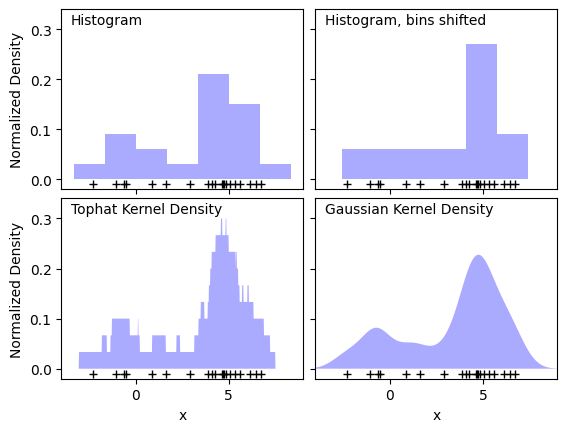

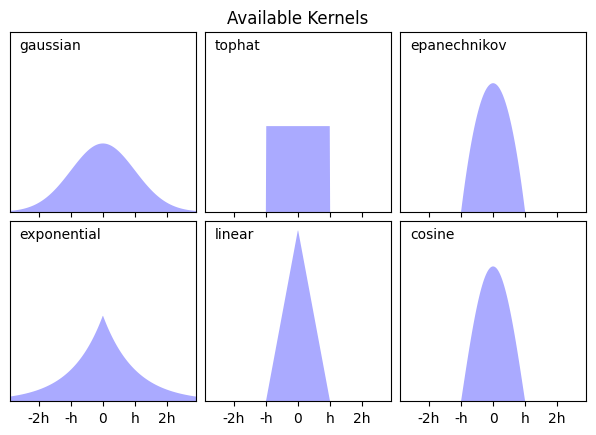

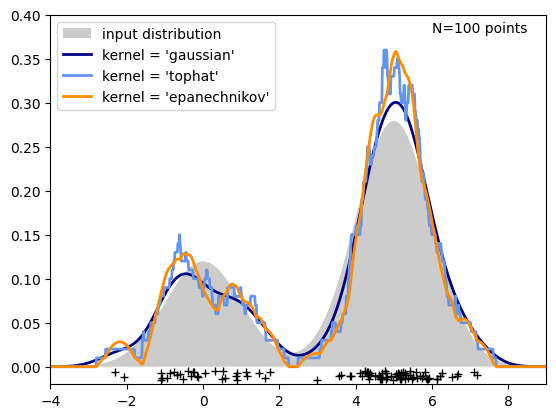

In [1]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()